<a href="https://colab.research.google.com/github/Uh-hub/avocado/blob/circleci-project-setup/(study1)titanic_age_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from pycaret.utils import enable_colab
# enable_colab()

In [2]:
!pip install pycaret

In [3]:
#train 데이터 / 나머지 원핫 / age는 NaN 데이터가 200개 이기 때문에 age를 종속 변수로 두고 또 모델 돌리고 싶음
import pandas as pd

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train.head() #전부 불러오는데 시간이 걸리기 때문에 간략
#NaN : not a number

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import tensorflow as tf
import numpy as np

#여기에서는 필요한 열 뽑기
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]


#dummies  pclass랑 sex는 원핫 인코딩 (test,train 모두)
train = pd.get_dummies(train, columns = ['Pclass']) 
train = pd.get_dummies(train, columns = ['Sex'])

test = pd.get_dummies(test, columns = ['Pclass'])
test = pd.get_dummies(test, columns = ['Sex'])


#embark 결측치 행 2개 제거(train)
train['Embarked'].dropna(axis=0)

#dummies  pclass랑 sex는 원핫 인코딩 (test,train 모두)
train = pd.get_dummies(train, columns = ['Embarked'])
test = pd.get_dummies(test, columns = ['Embarked'])



# train = train.dropna(axis=0)
# print(train.info())

#Family_SIze = SibSp + Parch(train)
Family_Size =  train['SibSp'] + train['Parch']
train['Family Size'] = Family_Size
train = train.drop(['SibSp', 'Parch'], axis = 1)

#Family_SIze = SibSp + Parch(test)
Family_Size =  test['SibSp'] + test['Parch']
test['Family Size'] = Family_Size
test = test.drop(['SibSp', 'Parch'], axis = 1)

train.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family Size
0,0,22.0,7.2500,0,0,1,0,1,0,0,1,1
1,1,38.0,71.2833,1,0,0,1,0,1,0,0,1
2,1,26.0,7.9250,0,0,1,1,0,0,0,1,0
3,1,35.0,53.1000,1,0,0,1,0,0,0,1,1
4,0,35.0,8.0500,0,0,1,0,1,0,0,1,0


In [5]:
#survive를 뺀 df를 새로 만든 후 age를 맨앞으로 이동(train)
age_df = train[['Age', 'Fare',	'Pclass_1',	'Pclass_2',	'Pclass_3',	'Sex_female',	'Sex_male',	'Embarked_C',	'Embarked_Q',	'Embarked_S',	'Family Size']]
age_df = age_df.sort_values(by=['Age'], axis=0, na_position='last')

In [6]:
age_df.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family Size
803,0.42,8.5167,0,0,1,0,1,1,0,0,1
755,0.67,14.5000,0,1,0,0,1,0,0,1,2
644,0.75,19.2583,0,0,1,1,0,1,0,0,3
469,0.75,19.2583,0,0,1,1,0,1,0,0,3
78,0.83,29.0000,0,1,0,0,1,0,0,1,2


In [7]:
age_df = age_df.reset_index()

In [8]:
print(age_df['Age'][714])

nan


In [9]:
age_df_train_fin = age_df[:714] #전처리 한 거 test랑 train으로 나눔
age_df_test_fin = age_df[714:]

In [10]:
age_df_train_fin.head()

,index,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family Size
0,803,0.42,8.5167,0,0,1,0,1,1,0,0,1
1,755,0.67,14.5000,0,1,0,0,1,0,0,1,2
2,644,0.75,19.2583,0,0,1,1,0,1,0,0,3
3,469,0.75,19.2583,0,0,1,1,0,1,0,0,3
4,78,0.83,29.0000,0,1,0,0,1,0,0,1,2


In [11]:
age_df_train = age_df_train_fin[['Age','Fare','Pclass_1','Pclass_2','Pclass_3','Family Size']] #최종 : age 뽑는 거. age_df_train
age_df_test = age_df_test_fin[['Pclass_1','Fare','Pclass_2','Pclass_3','Family Size']]

In [12]:
age_df_train.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family Size
0,0.42,8.5167,0,0,1,1
1,0.67,14.5000,0,1,0,2
2,0.75,19.2583,0,0,1,3
3,0.75,19.2583,0,0,1,3
4,0.83,29.0000,0,1,0,2


In [13]:
!pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

In [14]:
import pandas as pd
from pycaret.regression import *

setup(data=age_df_train, target='Age', session_id=123, silent=True)

,Description,Value
0,session_id,123
1,Target,Age
2,Original Data,"(714, 6)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(499, 12)"


(False,
 {'Bagging': <pycaret.containers.models.regression.BaggingRegressorContainer at 0x7f32a94dba50>,
  'Stacking': <pycaret.containers.models.regression.StackingRegressorContainer at 0x7f32a12e8dd0>,
  'Voting': <pycaret.containers.models.regression.VotingRegressorContainer at 0x7f32a948e1d0>,
  'ada': <pycaret.containers.models.regression.AdaBoostRegressorContainer at 0x7f32a12e8650>,
  'ard': <pycaret.containers.models.regression.AutomaticRelevanceDeterminationContainer at 0x7f32a94b13d0>,
  'br': <pycaret.containers.models.regression.BayesianRidgeContainer at 0x7f32a94b1b90>,
  'dt': <pycaret.containers.models.regression.DecisionTreeRegressorContainer at 0x7f32a944bd10>,
  'en': <pycaret.containers.models.regression.ElasticNetContainer at 0x7f32a948e490>,
  'et': <pycaret.containers.models.regression.ExtraTreesRegressorContainer at 0x7f32a12e8310>,
  'gbr': <pycaret.containers.models.regression.GradientBoostingRegressorContainer at 0x7f32a12e87d0>,
  'huber': <pycaret.containers

In [15]:
age_df_train.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family Size
0,0.42,8.5167,0,0,1,1
1,0.67,14.5000,0,1,0,2
2,0.75,19.2583,0,0,1,3
3,0.75,19.2583,0,0,1,3
4,0.83,29.0000,0,1,0,2


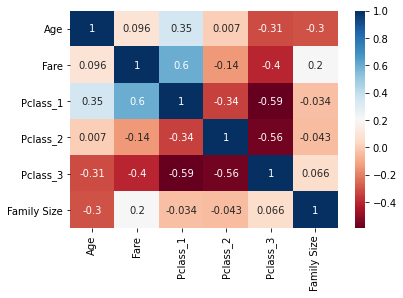

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(age_df_train.corr(), annot = True, cmap = 'RdBu')

In [17]:
age_df_test = age_df_test.reset_index()

In [18]:
best_model = compare_models()
#age랑 관련 있는 거 = age_df_train , test 로 뺀거임

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,10.2495,167.2687,12.8499,0.1804,0.6389,1.2077,0.015
ridge,Ridge Regression,10.2822,169.0135,12.9140,0.1721,0.6383,1.1911,0.016
huber,Huber Regressor,10.1755,169.5522,12.9174,0.1710,0.6330,1.1749,0.045
lr,Linear Regression,10.3198,171.2874,13.0027,0.1608,0.6406,1.1879,0.266
lar,Least Angle Regression,10.3198,171.2864,13.0027,0.1608,0.6406,1.1879,0.018
ada,AdaBoost Regressor,10.7766,176.2576,13.2198,0.1307,0.6556,1.2863,0.037
lasso,Lasso Regression,10.6024,182.0150,13.4238,0.1111,0.6808,1.4365,0.017
gbr,Gradient Boosting Regressor,10.5662,181.4341,13.3916,0.1069,0.6464,1.1499,0.057
lightgbm,Light Gradient Boosting Machine,10.7057,185.0418,13.4864,0.0940,0.6546,1.2065,0.073
omp,Orthogonal Matching Pursuit,10.6584,188.6015,13.6715,0.0759,0.6923,1.4783,0.014


In [19]:
finalized_model = finalize_model(best_model)
print(finalized_model)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)


In [20]:
tuned_model = tune_model(finalized_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.6950,168.9737,12.9990,0.3455,0.8552,2.3790
1,7.9291,108.0345,10.3940,0.1884,0.3899,0.3684
2,9.3156,135.4716,11.6392,0.2842,0.6077,0.8523
3,12.0740,234.0919,15.3001,0.0963,0.7148,1.4544
4,11.2910,198.2632,14.0806,0.2247,0.8410,2.1471
5,11.5225,185.0363,13.6028,-0.0389,0.6733,1.2807
6,11.4634,188.6571,13.7353,0.0400,0.4983,0.6580
7,8.8405,127.4793,11.2907,0.3299,0.6089,1.0162
8,8.4911,134.0933,11.5799,0.2659,0.5477,0.8518
9,10.8701,192.4632,13.8731,0.0686,0.6524,1.0714


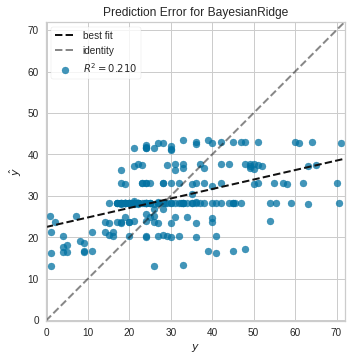

In [21]:
plot_model(tuned_model, plot='error')

In [22]:
prediction = predict_model(finalized_model, data=age_df_test) 

In [23]:
print(age_df_train_fin.info())
print(age_df_test_fin.info())
print(age_df_train.info())
print(prediction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        714 non-null    int64  
 1   Age          714 non-null    float64
 2   Fare         714 non-null    float64
 3   Pclass_1     714 non-null    uint8  
 4   Pclass_2     714 non-null    uint8  
 5   Pclass_3     714 non-null    uint8  
 6   Sex_female   714 non-null    uint8  
 7   Sex_male     714 non-null    uint8  
 8   Embarked_C   714 non-null    uint8  
 9   Embarked_Q   714 non-null    uint8  
 10  Embarked_S   714 non-null    uint8  
 11  Family Size  714 non-null    int64  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 28.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 714 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        177 non-null    int64  
 1   Age

In [24]:
# prediction['Label'] = prediction['Label'].astype(int)
# prediction.head()

In [25]:
prediction.rename(columns={'Label':'Age'},inplace=True)
prediction.head()
#prediction 에서 label을 age로 바꿈

,index,Pclass_1,Fare,Pclass_2,Pclass_3,Family Size,Age
0,714,0,8.4583,0,1,0,28.060049
1,715,0,13.0000,1,0,0,33.270010
2,716,0,7.2250,0,1,0,28.089946
3,717,0,7.2250,0,1,0,28.089946
4,718,0,7.8792,0,1,0,28.074087


In [26]:
prediction = prediction[['Age' ,'Pclass_1','Pclass_2','Pclass_3', 'Family Size']]
print(prediction.head())
print(prediction.info())

         Age  Pclass_1  Pclass_2  Pclass_3  Family Size
0  28.060049         0         0         1            0
1  33.270010         0         1         0            0
2  28.089946         0         0         1            0
3  28.089946         0         0         1            0
4  28.074087         0         0         1            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          177 non-null    float64
 1   Pclass_1     177 non-null    uint8  
 2   Pclass_2     177 non-null    uint8  
 3   Pclass_3     177 non-null    uint8  
 4   Family Size  177 non-null    int64  
dtypes: float64(1), int64(1), uint8(3)
memory usage: 3.4 KB
None


In [27]:
age_df_test_fin.head()
# print(age_df_test_fin.info())

,index,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family Size
714,5,NaN,8.4583,0,0,1,0,1,0,1,0,0
715,17,NaN,13.0000,0,1,0,0,1,0,0,1,0
716,19,NaN,7.2250,0,0,1,1,0,1,0,0,0
717,26,NaN,7.2250,0,0,1,0,1,1,0,0,0
718,28,NaN,7.8792,0,0,1,1,0,0,1,0,0


In [36]:
pred_age = prediction['Age']
pred_age = pd.DataFrame(pred_age, columns = ['Age'])
pred_age.head()

,Age
0,28.060049
1,33.270010
2,28.089946
3,28.089946
4,28.074087


In [31]:
age_df_test_fin = age_df_test_fin.drop(['Age', 'index'],axis = 1) 
age_df_test_fin.head()

,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family Size
714,8.4583,0,0,1,0,1,0,1,0,0
715,13.0000,0,1,0,0,1,0,0,1,0
716,7.2250,0,0,1,1,0,1,0,0,0
717,7.2250,0,0,1,0,1,1,0,0,0
718,7.8792,0,0,1,1,0,0,1,0,0


In [38]:
age_df_test_fin = pd.DataFrame(age_df_test_fin)

In [44]:
survive_test = pd.concat([pred_age, age_df_test_fin])
survive_test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family Size
0,28.060049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.270010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28.089946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.089946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28.074087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,7.2292,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
887,NaN,69.5500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,10.0
888,NaN,9.5000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
889,NaN,7.8958,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# age_finish = pd.concat([prediction, age_df_train]) #age랑 관련해서 뺀거야 

#대기

In [ ]:
# age_finish.info()

In [ ]:
# train.info()

In [ ]:
# train_2 = train[['Survived', 'Fare','Pclass_1','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]
# train_2.info()

In [ ]:
# train_2.head()

In [ ]:
# age_finish.head()

Fare를 기준으로 모두 sort 하기

In [ ]:
# age_finish = age_finish.sort_values(by=['Fare'], axis=0)
# age_df = age_df.sort_values(by=['Fare'], axis = 0)

In [ ]:
# survive_train = pd.merge(age_df, age_finish, on='Fare')
# survive_train.info()